In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [4]:
titanic = pd.read_csv("Titanic_Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic.drop(['PassengerId','Name','Ticket','Embarked','Cabin'],inplace=True,axis=1)

#### Missing Values for features

In [7]:
[[features,titanic[features].isnull().sum()] for features in titanic.columns if titanic[features].isnull().sum()>0]

[['Age', np.int64(86)], ['Fare', np.int64(1)]]

#### Heat Map for Missing Values

<Axes: >

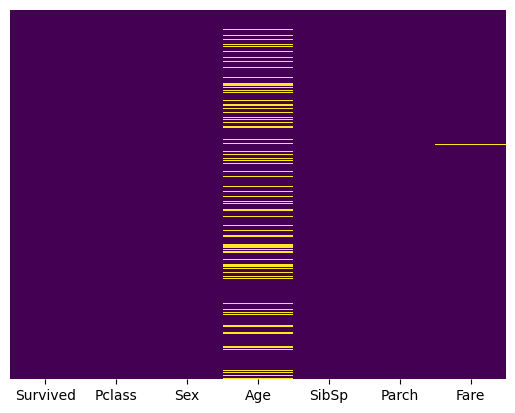

In [8]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [10]:
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,57,50,107
2,63,30,93
3,146,72,218
All,266,152,418


In [11]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True)

,Pclass,1,2,3,All
Sex,Survived,,,,
female,1,50,30,72,152
male,0,57,63,146,266
All,,107,93,218,418


In [12]:
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

ValueError: could not convert string to float: 'male'

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
text_data=['Sex']
for i in text_data:
  titanic[i]=le.fit_transform(titanic[i].astype(str))

In [ ]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [ ]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70 , test_size = 0.30, random_state = 1, shuffle=True)

In [ ]:
from sklearn import tree
#classifier = tree.DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier(max_depth=3, )

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_test, y_pred)

0.7873134328358209

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  18],
       [ 39,  76]], dtype=int64)

Text(33.0, 0.5, 'Truth')

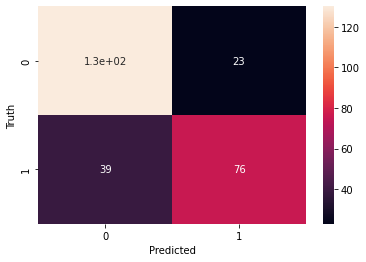

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       153
           1       0.81      0.66      0.73       115

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



#### References

https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook

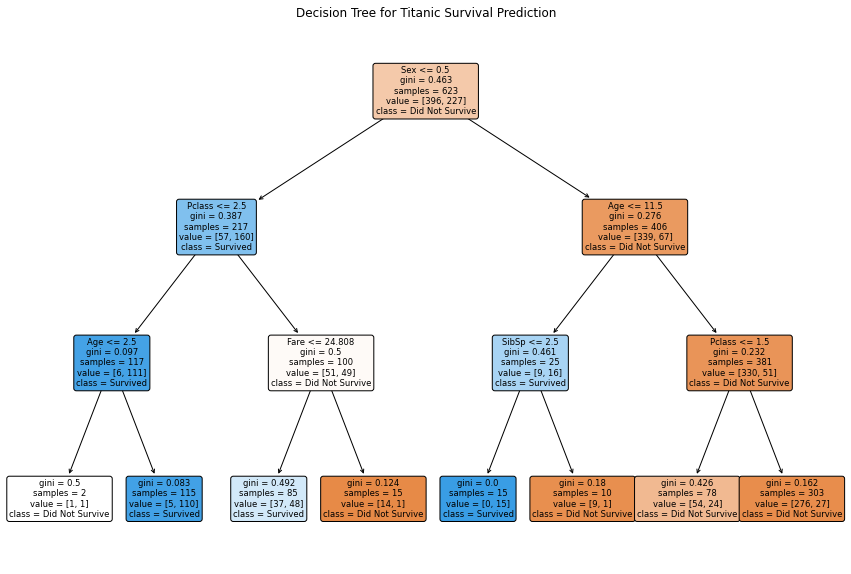

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['Did Not Survive', 'Survived'], rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()